## Demonstration of Data Decorrelation using the Principle Component Analysis

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook illustrates the 

* decorrelation of high-dimensional correlated features and
* mapping of the features onto a low-dimensional latent space

using [Principle Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA). The principle components are derived by computing the eigenvectors of the covariance matrix. As alternative, the eigenvectors are computed by using the [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD) of the data matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In the following, a synthetic dataset with $N$ examples is generated by drawing samples from a $K$-[variate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) which are mapped into a $F$-dimensional feature space using a linear mapping.

In [2]:
N = 500  # number of examples
F = 16  # dimensionality of feature space
K = 3  # latent dimensions


def generate_dataset(N, F, K):

    # draw samples from multivariante normal distribution
    np.random.seed(3)
    mean = np.random.uniform(low=-5, high=5, size=K)
    cov = np.diag(np.arange(K)**2) + np.random.uniform(size=(K, K))
    cov = cov * cov.T
    Xraw = np.random.multivariate_normal(mean, cov, size=N)

    # map low-dimensional samples into feature space
    A = np.random.uniform(low=-2, high=2, size=(K, F))
    A = A * np.random.choice([0, 1], size=(K, F), p=[2./10, 8./10])
    X = np.dot(Xraw, A)

    return X


X = generate_dataset(N, F, K)

The data is visualized by plotting the data points in subsets of the high-dimensional dataset. It should become obvious that the features are correlated and that it is hard to observe the intrinsic dimensionality of the dataset.

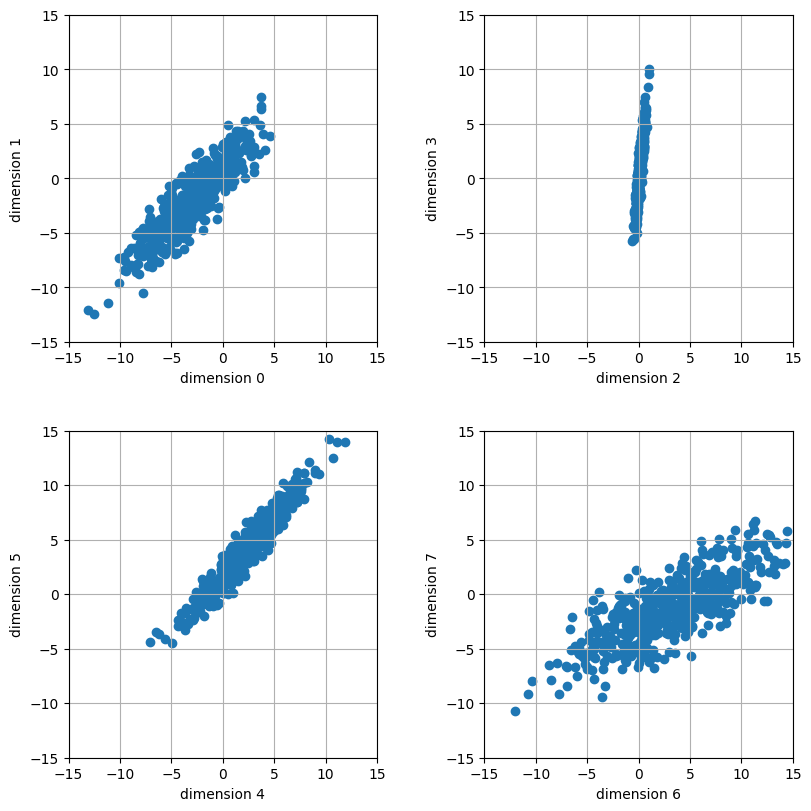

In [3]:
def plot_data_subdimensions(X, vmax=15, vmin=-15):

    fig = plt.figure(figsize=(8, 8), constrained_layout=True)
    gs = fig.add_gridspec(2, 2, wspace=.1, hspace=.1)

    for n in range(4):
        ax = plt.subplot(gs[n])
        ax.scatter(X[:, 2*n], X[:, 2*n+1])
        ax.set_xlabel('dimension {}'.format(2*n))
        ax.set_ylabel('dimension {}'.format(2*n+1))
        ax.axis([vmin, vmax, vmin, vmax])
        ax.grid()


plot_data_subdimensions(X)

### Principle Component Analysis

We first normalize the data by subtracting the sample mean and compute the covariance matrix

In [4]:
X = X - np.mean(X, axis=0)
Cx = 1/(N-1) * np.matmul(X.T, X)

The covariance matrix is visualized by plotting its entries as a two-dimensional image were the color denotes the covariances of the individual features. The correlations between the different dimensions of the feature space are now clearly visible.

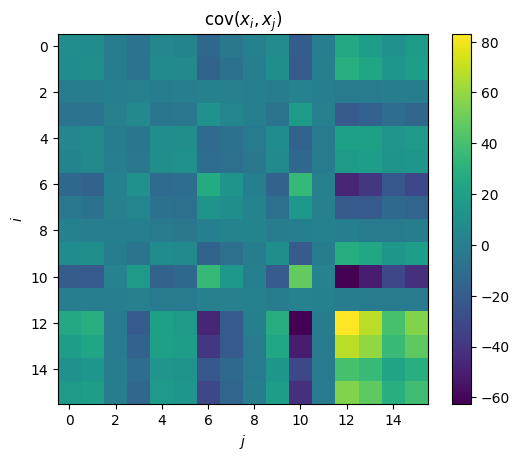

In [5]:
def plot_covariance_matrix(C, title):

    plt.imshow(C, interpolation='nearest')
    plt.title(title)
    plt.xlabel(r'$j$')
    plt.ylabel(r'$i$')
    plt.colorbar()
    
    
plot_covariance_matrix(Cx, r'cov($x_i, x_j$)')

Now an eigenvalue decomposition of the correlation matrix is performed in order to derive the eigenvalues and eigenvectors (principle components). Both are sorted by decreasing magnitude of the eigenvalues.

In [6]:
E, V = np.linalg.eigh(Cx)

idx = E.argsort()[::-1]   
E = E[idx]
V = V[:,idx]

Lets inspect the singular values in order to estimate the dimensionality of the latent space

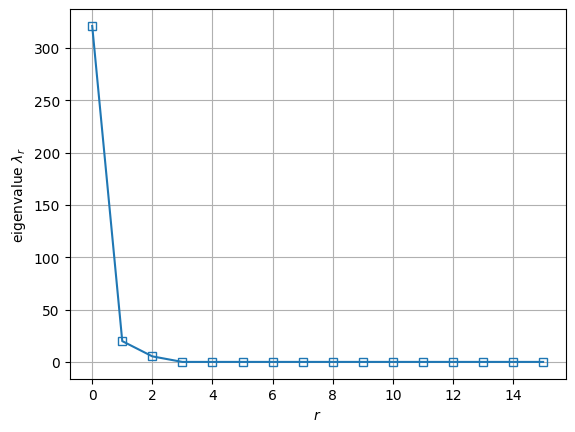

In [7]:
def scree_plot(S):
    '''Plots a scree plot of the eigenvalues.'''
    line, = plt.plot(S, marker='s', markerfacecolor='none')
    plt.xlabel(r'$r$')
    plt.ylabel(r'eigenvalue $\lambda_r$')
    plt.grid()
    
    return line


scree_plot(E);

### Singular Value Decomposition

As alternative to the eigenvalue decomposition of the covariance matrix, a SVD of the data matrix can be perfomed to derive the principle components

In [8]:
U, S, Vh = np.linalg.svd(X)

Lets compare the such derived singular values with the eigenvalues from the PCA by plotting $\frac{\sigma_f^2}{N-1}$. Its obvious that the SVD and the PCA deliver the same results.

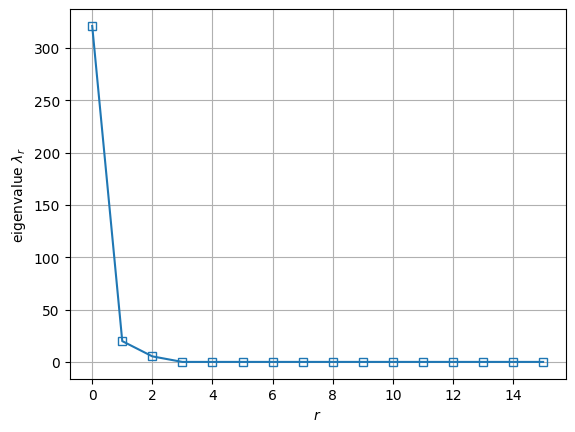

In [9]:
scree_plot(S**2/(N-1))

In order to confirm the equivalence of both methods to compute the principle components, these are compared for the first $K=3$ latent dimensions. Since the eigenvalues are very close to zero for the higher dimensions, the principle components contain mainly noise due to the limited numerical accuracy of the decompositions. The comparison proves that both methods give indeed the same results, besides the signs of the eigenvectors.

In [10]:
np.allclose(np.abs(V[:,:K]), np.abs(Vh[:K,:]).T)

True

### Mapping onto principal components

The data points are now mapped onto the principle components

In [11]:
Y = np.matmul(X, V)

The mapped data is visualized by plotting it in subsets of the dimensions of the principle components. It should become obvious that the features are decorrelated and that it is now easy to observe the intrinsic dimensionality of the dataset.

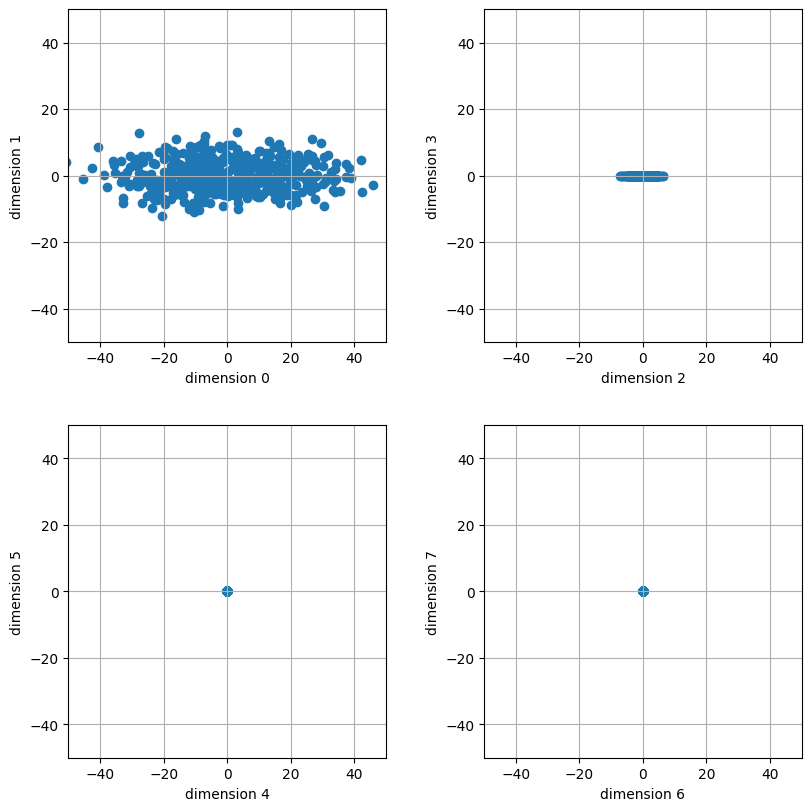

In [12]:
plot_data_subdimensions(Y, vmin=-50, vmax=50)

The decorrelation can be confirmed by computing and plotting the covariance matrix of the mapped dataset

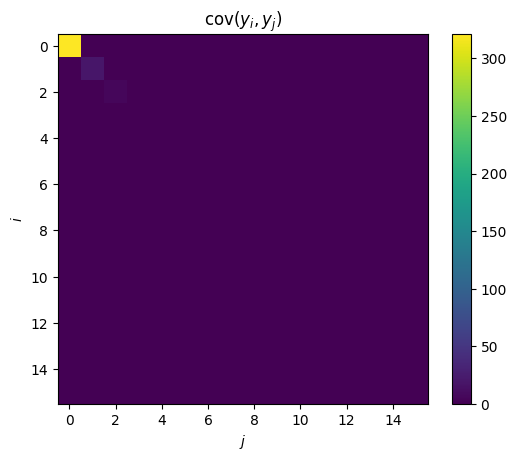

In [13]:
Cy = 1/(N-1) * np.matmul(Y.T, Y)

plot_covariance_matrix(Cy, r'cov($y_i, y_j$)')

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.